In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

thread_times = pd.read_csv("real_work_dict.csv", index_col = [0])

thread_times["1_tmp"] = thread_times["1"]

for thread in list(thread_times.columns):
    thread_times[thread] = thread_times["1_tmp"]/thread_times[thread]

thread_times.drop(columns=["1_tmp"], inplace=True)

thread_times.to_csv("Speedup_Table.csv")
display(thread_times)

,1,2,4,8
blackscholes,1.0,1.196347,2.607051,3.364252
canneal,1.0,1.351422,1.932499,2.574983
dedup,1.0,1.727810,2.064407,2.193242
ferret,1.0,1.940099,3.300684,3.843400
freqmine,1.0,1.756363,3.846472,4.768873
radix,1.0,1.744943,3.550823,5.418378
vips,1.0,1.945513,3.719658,4.315458


In [3]:
df = thread_times.copy()

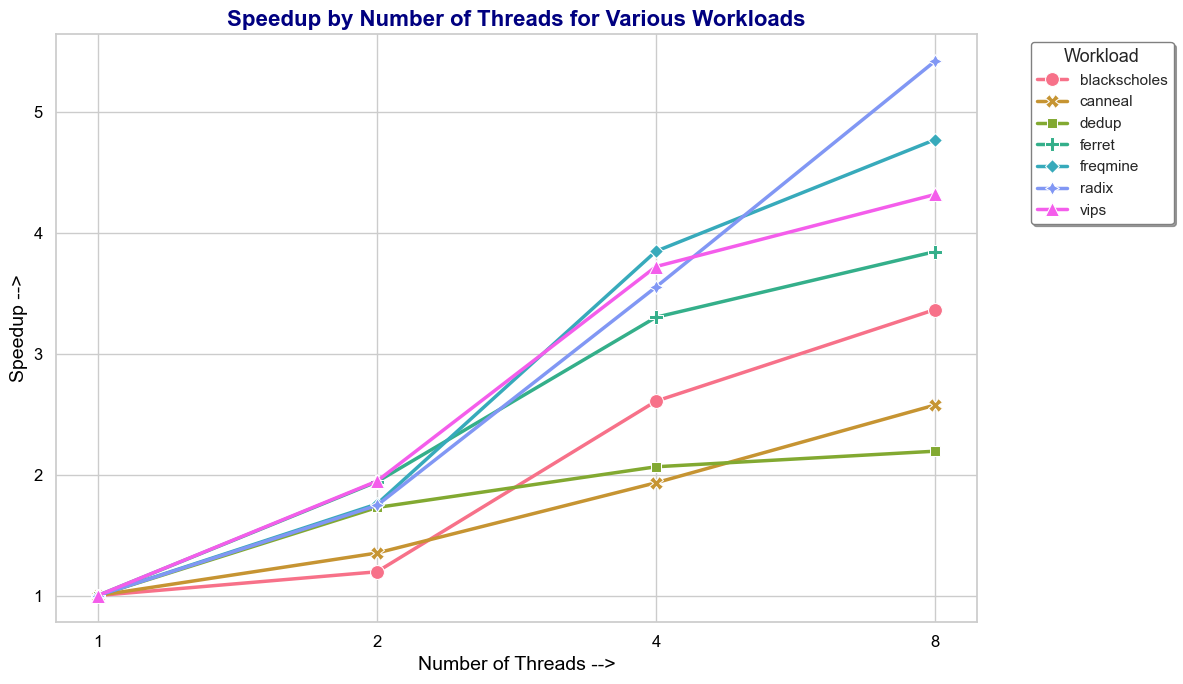

In [4]:
df_long = df.reset_index().melt(id_vars="index", var_name="Threads", value_name="Speedup")
df_long.rename(columns={'index': 'Workload'}, inplace=True)

# Customizing the plot with a professional and aesthetic theme
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 7))

# Create a color palette with seaborn.color_palette() or sns.set_palette()
palette = sns.color_palette("husl", df_long['Workload'].nunique())

# Plotting with customized aesthetics
lineplot = sns.lineplot(
    data=df_long,
    x="Threads",
    y="Speedup",
    hue="Workload",
    style="Workload",
    markers=True,  # This ensures that each point has a marker
    dashes=False,  # This makes all lines solid
    palette=palette,
    linewidth=2.5,
    markersize=10,
)

# Enhancing the legend
leg = plt.legend(title='Workload', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, shadow=True, fancybox=True)
leg.get_frame().set_color('white')
leg.get_frame().set_edgecolor('gray')
leg.get_title().set_fontsize('13')

# Adding titles and labels with customized fonts
plt.title('Speedup by Number of Threads for Various Workloads', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Threads -->', fontsize=14, fontweight='regular', color='black')
plt.ylabel('Speedup -->', fontsize=14, fontweight='regular', color='black')

# Customizing tick labels for better readability
plt.xticks(fontsize=12, fontweight='regular', color='black')
plt.yticks(fontsize=12, fontweight='regular', color='black')

# Optionally, setting a limit for the y-axis can sometimes make the data comparison easier
# plt.ylim(0, df_long['Speedup'].max() * 1.1)

plt.grid(True)  # Ensure the grid is visible but not too prominent
plt.tight_layout()  # Adjust the padding between and around subplots

# Save the figure with high quality
plt.savefig('Part2B_Plot.png', dpi=300, bbox_inches='tight')
plt.show()